In [4]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier  
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [5]:
from graphviz import Source
import matplotlib.pyplot as plt
from IPython.display import Image  
import pydotplus
import pandas as pd 
import numpy as np

In [6]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [10]:
columns = ['Sample code number','Clump Thickness','Uniformity of Cell Size ','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei',' Bland Chromatin','Normal Nucleoli',' Mitoses ','Class'];
cancer = pd.read_csv('/content/gdrive/My Drive/4th year/Data Analytics/datafile.csv',names=columns)

In [11]:
cancer.drop(columns='Sample code number', inplace = True)
cancer["Class"].replace({2: -1, 4: +1}, inplace=True)

In [12]:
x = cancer.iloc[:, :-1].values
y = cancer.iloc[:, 9].values
print(cancer.head())

   Clump Thickness  Uniformity of Cell Size   ...   Mitoses   Class
0                5                         1  ...          1     -1
1                5                         4  ...          1     -1
2                3                         1  ...          1     -1
3                6                         8  ...          1     -1
4                4                         1  ...          1     -1

[5 rows x 10 columns]


In [ ]:
#cancer = datasets.load_breast_cancer()
#x = cancer.data
#y = cancer.target

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=109) #We can then split our data for training and testing

In [14]:
SVM = svm.SVC(kernel='linear') 
SVM.fit(X_train, y_train)  #let’s train our SVM model with our “training” dataset.
y_prediction_svm = SVM.predict(X_test) # we can make predictions on the test data and store the predictions in a variable called y_pred:, Let’s use our trained model to make a prediction using our testing data

In [15]:
ID3 = DecisionTreeClassifier(criterion="entropy")
ID3.fit(X_train, y_train)
y_prediction_id3 = ID3.predict(X_test)

In [16]:
print("Accuracy with SVM  :",metrics.accuracy_score(y_test, y_prediction_svm)) # This is simply the total number of  correct predictions divided by the number of data points in the test set.
print("Precision with SVM :",metrics.precision_score(y_test, y_prediction_svm))
print("Recall with SVM    :",metrics.recall_score(y_test, y_prediction_svm))
print("F1 Score with SVM  :",metrics.f1_score(y_test, y_prediction_svm))

Accuracy with SVM  : 0.9666666666666667
Precision with SVM : 0.9452054794520548
Recall with SVM    : 0.9583333333333334
F1 Score with SVM  : 0.9517241379310345


In [17]:
print(classification_report(y_test, y_prediction_svm))

              precision    recall  f1-score   support

          -1       0.98      0.97      0.97       138
           1       0.95      0.96      0.95        72

    accuracy                           0.97       210
   macro avg       0.96      0.96      0.96       210
weighted avg       0.97      0.97      0.97       210



In [18]:
conf_matrix_svm = metrics.confusion_matrix(y_test, y_prediction_svm) 
print(conf_matrix_svm) #Let’s generate our confusion matrix array

[[134   4]
 [  3  69]]


In [19]:
def confusion_metrics (matrix):
    TP = matrix[1][1]
    TN = matrix[0][0]
    FP = matrix[0][1]
    FN = matrix[1][0]
    conf_sensitivity = (TP / float(TP + FN))
    conf_specificity = (TN / float(TN + FP))
    print(f'Sensitivity : {round(conf_sensitivity,2)}') 
    print(f'Specificity : {round(conf_specificity,2)}')

In [20]:
confusion_metrics(conf_matrix_svm)

Sensitivity : 0.96
Specificity : 0.97


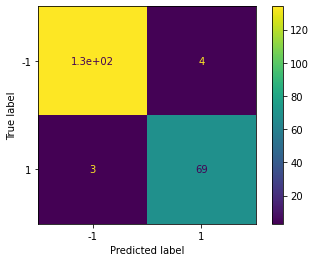

In [21]:
metrics.plot_confusion_matrix(SVM, X_test, y_test) #as a plot

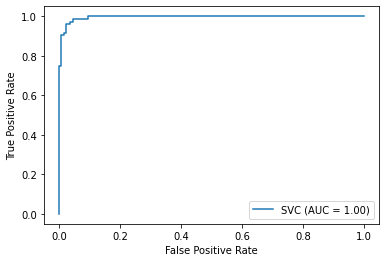

In [22]:
metrics.plot_roc_curve(SVM, X_test, y_test) #generate ROC curve

In [23]:
print("Accuracy with ID3 :",metrics.accuracy_score(y_test, y_prediction_id3))
print("Precision with ID3:",metrics.precision_score(y_test, y_prediction_id3))
print("Recall with ID3   :",metrics.recall_score(y_test, y_prediction_id3))
print("F1 Score with ID3 :",metrics.f1_score(y_test, y_prediction_id3))

Accuracy with ID3 : 0.9428571428571428
Precision with ID3: 0.9411764705882353
Recall with ID3   : 0.8888888888888888
F1 Score with ID3 : 0.9142857142857143


In [24]:
print(classification_report(y_test, y_prediction_id3))

              precision    recall  f1-score   support

          -1       0.94      0.97      0.96       138
           1       0.94      0.89      0.91        72

    accuracy                           0.94       210
   macro avg       0.94      0.93      0.94       210
weighted avg       0.94      0.94      0.94       210



In [25]:
conf_matrix_id3 = metrics.confusion_matrix(y_test, y_prediction_id3) 
print(conf_matrix_id3)

[[134   4]
 [  8  64]]


In [26]:
confusion_metrics(conf_matrix_id3)

Sensitivity : 0.89
Specificity : 0.97


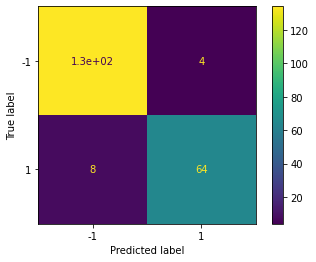

In [27]:
metrics.plot_confusion_matrix(ID3, X_test, y_test)

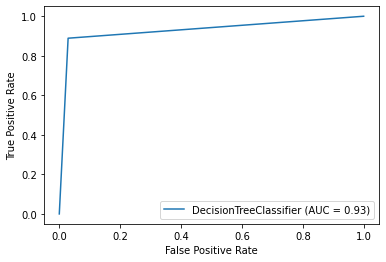

In [28]:
metrics.plot_roc_curve(ID3, X_test, y_test)